<a href="https://colab.research.google.com/github/chi-hun/dacon/blob/main/%EC%9E%90%EC%9C%A8%EC%A3%BC%ED%96%89_%EC%84%BC%EC%84%9C%EC%9D%98_%EC%95%88%ED%85%8C%EB%82%98_%EC%84%B1%EB%8A%A5_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

자율주행 센서의 안테나 성능 예측 AI 경진대회 https://dacon.io/competitions/official/235927/overview/description

# module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers

# data load

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# EDA

In [ ]:
train.info()

In [ ]:
train.isna().sum().sum()

0

In [ ]:
test.info()

In [ ]:
test.isna().sum().sum()

0

In [ ]:
train.shape

(39607, 71)

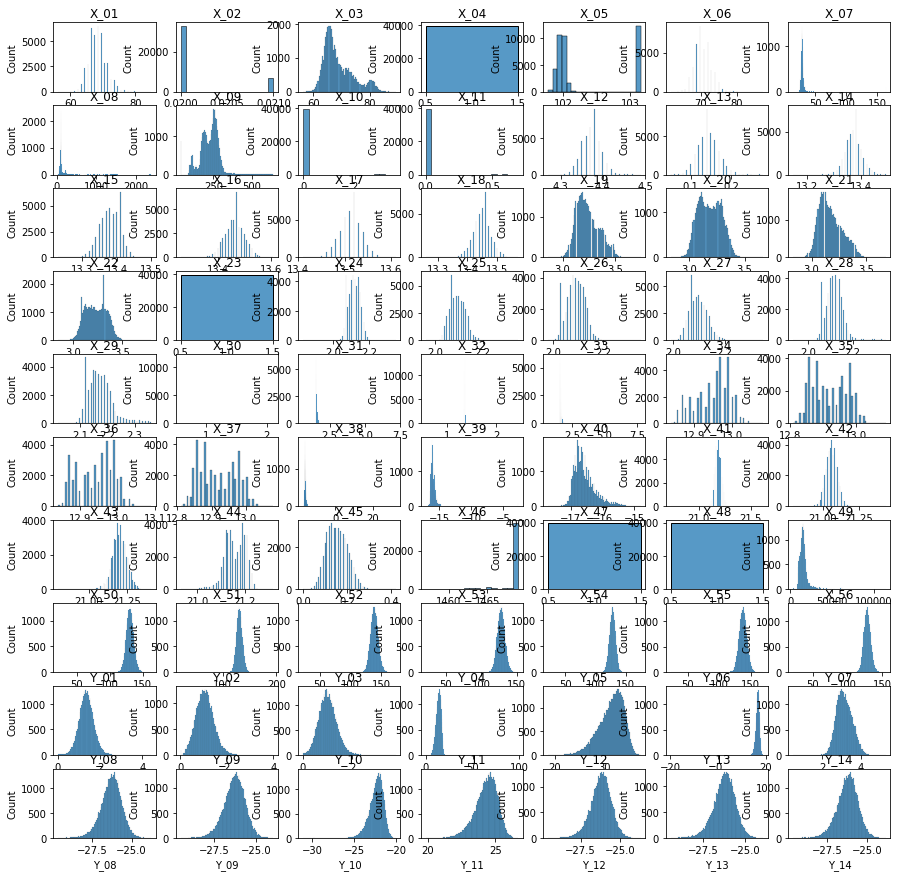

In [ ]:
plt.figure(figsize=(15,15))
for i in range(1,71):
    plt.subplot(10,7,i)
    cc = train.columns[i]
    plt.title(cc)
    sns.histplot(train[cc])
plt.show()

In [ ]:
train.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


In [ ]:
test.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39608.000000,39608.000000,39608.000000,39608.0,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,...,39608.0,39608.0,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000,39608.000000
mean,68.396003,103.320164,68.837921,1.0,102.337295,70.584656,29.465362,163.372693,225.199662,0.002560,...,1.0,1.0,16659.687707,130.792771,131.506077,138.619585,128.012468,128.024288,137.897399,128.479544
std,2.663089,0.000370,5.205770,0.0,0.547959,2.250952,7.869169,219.287019,66.266169,0.088746,...,0.0,0.0,8725.413782,6.283461,6.248113,6.711747,6.022616,5.783733,6.825189,5.766703
min,53.209000,103.320000,55.570000,1.0,101.734000,61.726000,13.390000,28.590000,37.580000,0.000000,...,1.0,1.0,2894.030000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,66.465000,103.320000,65.070000,1.0,101.950000,68.864000,27.900000,105.760000,188.410000,0.000000,...,1.0,1.0,13021.355000,127.007745,127.715514,134.507082,124.397173,124.726521,133.703757,125.172442
50%,68.504000,103.320000,67.270000,1.0,102.007000,69.884000,28.840000,115.040000,234.890000,0.000000,...,1.0,1.0,15252.580000,130.748868,131.460499,138.622976,128.048022,128.136952,137.892594,128.468109
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.880000,131.102500,263.990000,0.000000,...,1.0,1.0,17540.655000,134.562718,135.301195,142.792608,131.706046,131.502206,142.087140,131.889357
max,86.859000,103.321000,88.670000,1.0,103.161000,87.219000,163.860000,2387.440000,637.540000,3.500000,...,1.0,1.0,149599.930000,162.657956,161.207806,177.616739,169.774016,169.065281,169.452855,159.642590


In [ ]:
x, y = [],[]
for i in train.columns:
    if i[0] == 'X':
        x.append(i)
    elif i[0] == 'Y':
        y.append(i)
print(x)
print(y)

['X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56']
['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09', 'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14']


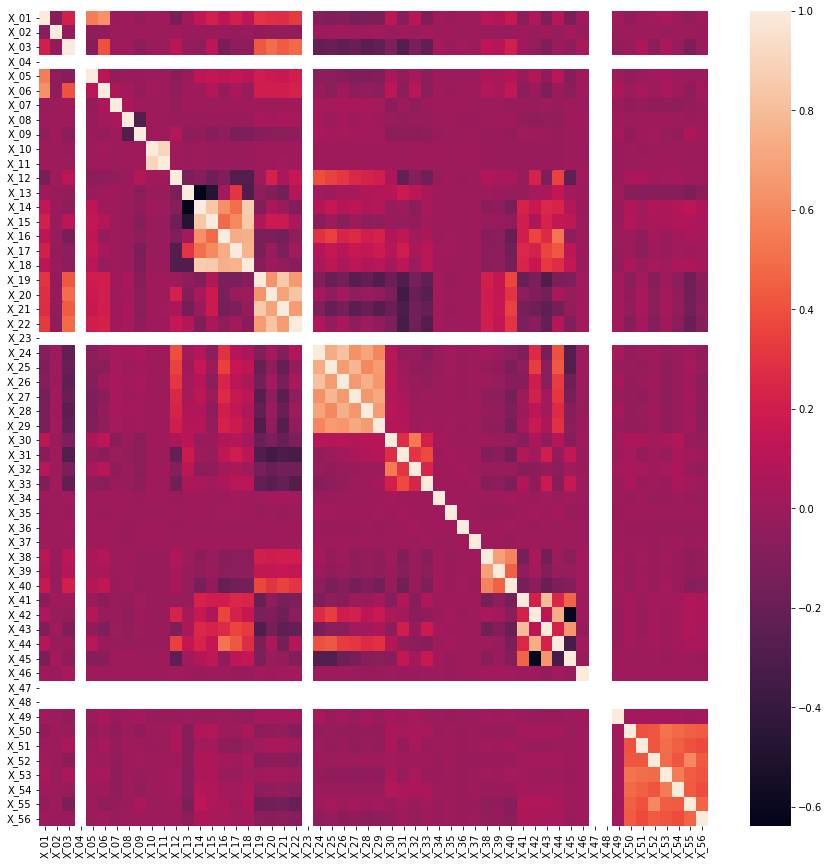

In [ ]:
plt.figure(figsize=(15,15))
cc = train[x].corr()
sns.heatmap(cc)
plt.show()

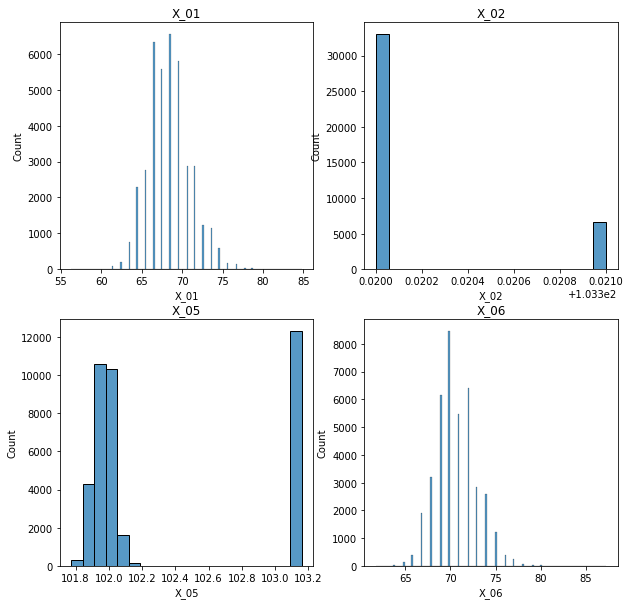

In [ ]:
wh = ['X_01', 'X_02', 'X_05', 'X_06']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(2,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

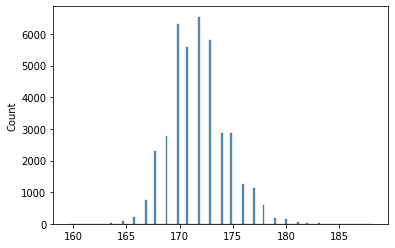

In [ ]:
aaa = train['X_01'] + train['X_02']
sns.histplot(aaa)
plt.show()

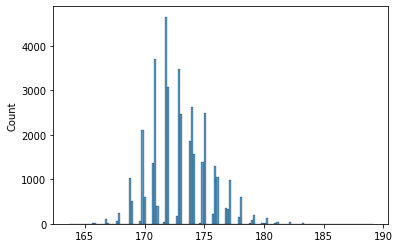

In [ ]:
bbb = train['X_05'] + train['X_06']
sns.histplot(bbb)
plt.show()

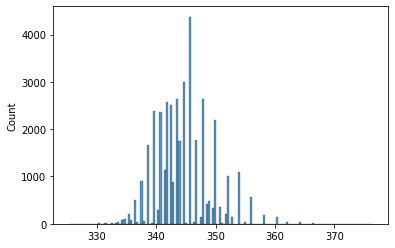

In [ ]:
ccc = aaa + bbb
sns.histplot(ccc)
plt.show()

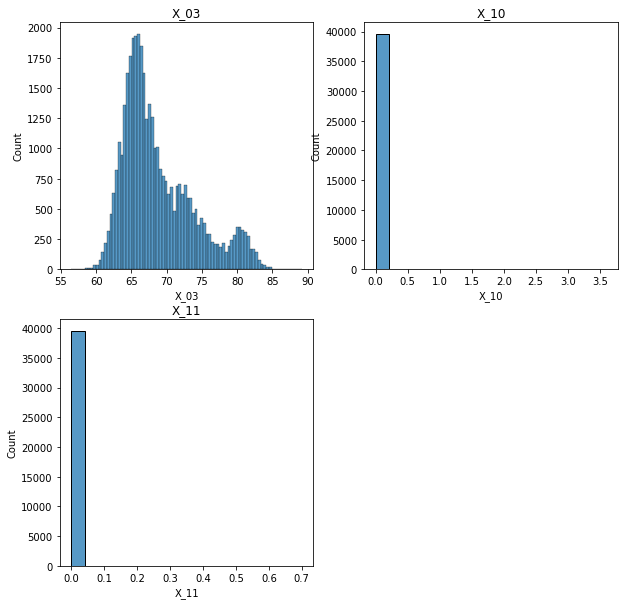

In [ ]:
wh = ['X_03', 'X_10', 'X_11']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(2,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

In [ ]:
train['X_11'].value_counts()

0.0    39580
0.5       12
0.6       11
0.4        3
0.7        1
Name: X_11, dtype: int64

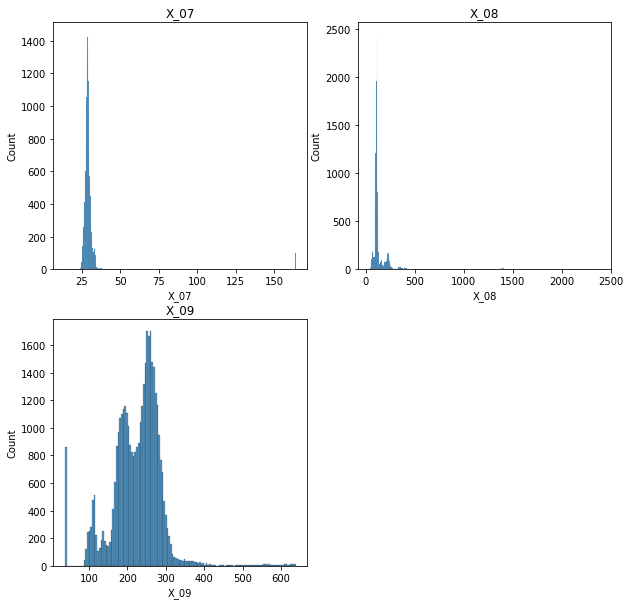

In [ ]:
wh = ['X_07', 'X_08', 'X_09']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(2,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

In [ ]:
train['X_09'].value_counts()

37.58     860
254.78     17
259.16     17
255.47     16
253.34     16
         ... 
344.72      1
340.36      1
156.59      1
389.36      1
301.95      1
Name: X_09, Length: 11137, dtype: int64

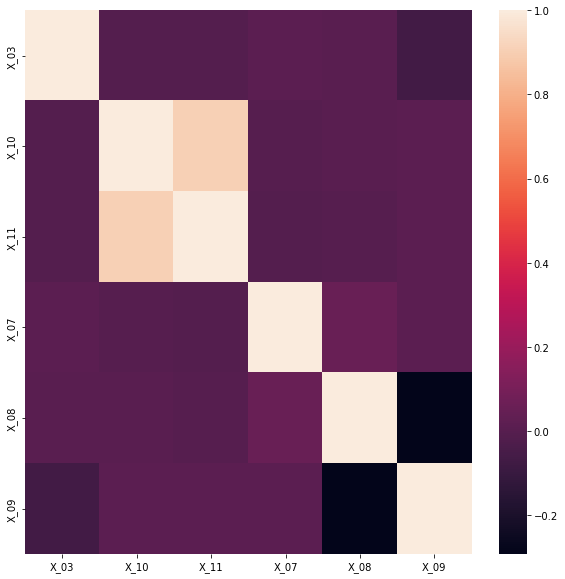

In [ ]:
plt.figure(figsize=(10,10))
cc = train[['X_03', 'X_10', 'X_11','X_07', 'X_08', 'X_09']].corr()
sns.heatmap(cc)
plt.show()

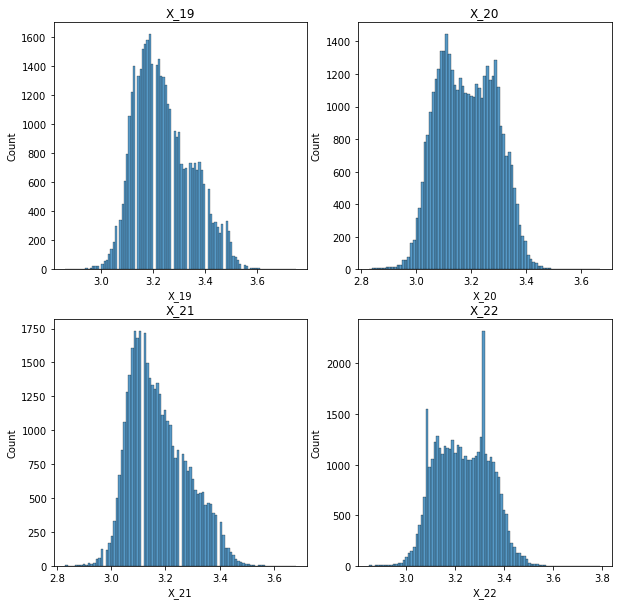

In [ ]:
wh = ['X_19', 'X_20', 'X_21','X_22']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(2,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

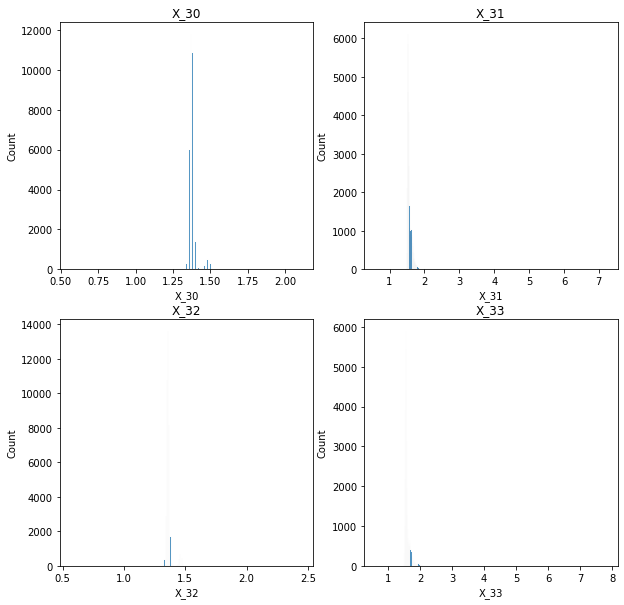

In [ ]:
wh = ['X_30', 'X_31', 'X_32','X_33']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(2,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

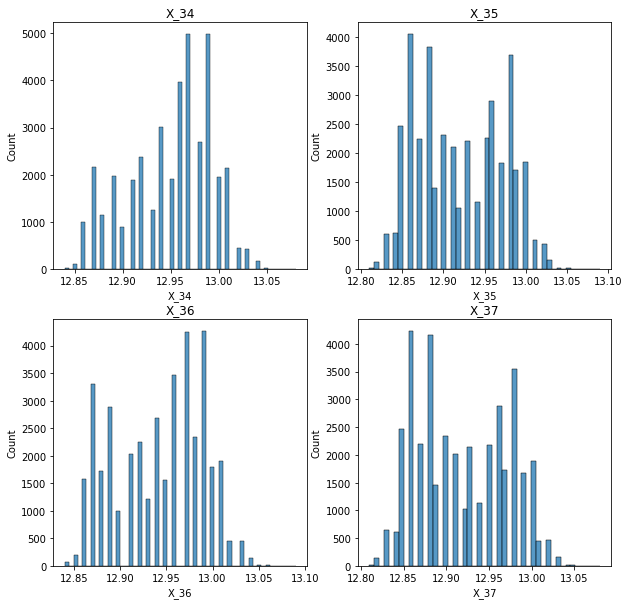

In [ ]:
wh = ['X_34', 'X_35', 'X_36','X_37']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(2,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

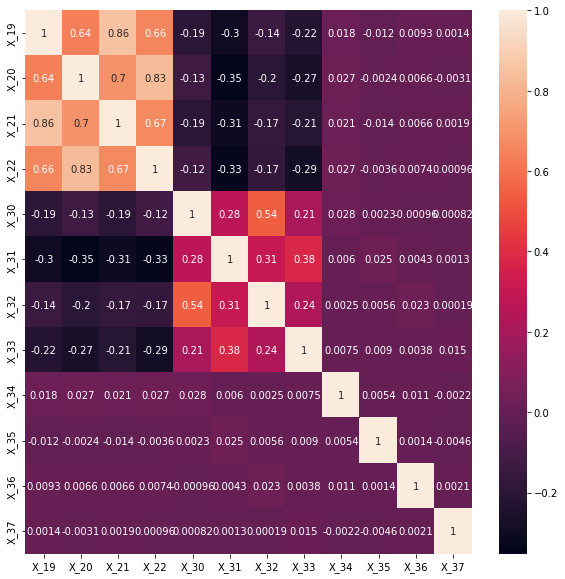

In [ ]:
plt.figure(figsize=(10,10))
cc = train[['X_19', 'X_20', 'X_21','X_22','X_30', 'X_31', 'X_32','X_33','X_34', 'X_35', 'X_36','X_37']].corr()
sns.heatmap(cc,annot=True)
plt.show()

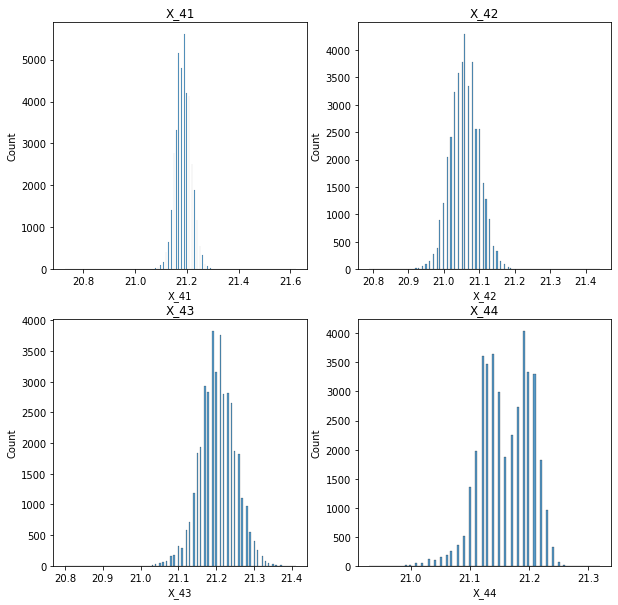

In [ ]:
wh = ['X_41', 'X_42', 'X_43','X_44']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(2,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

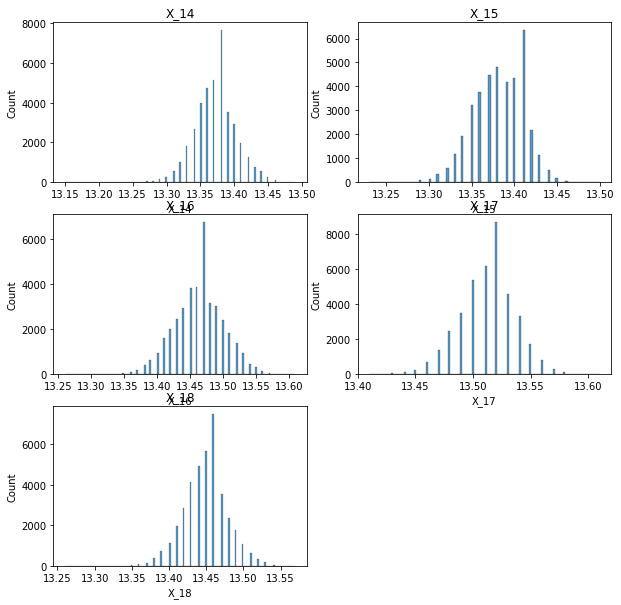

In [ ]:
wh = ['X_14', 'X_15', 'X_16','X_17','X_18']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(3,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

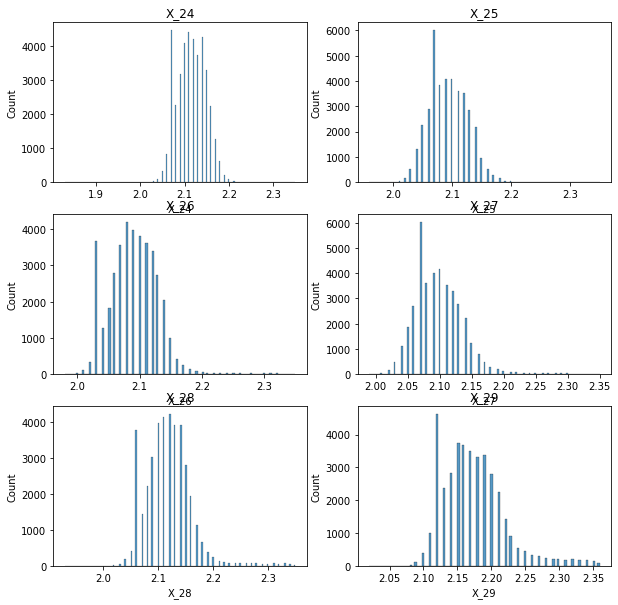

In [ ]:
wh = ['X_24', 'X_25', 'X_26','X_27','X_28','X_29']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(3,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

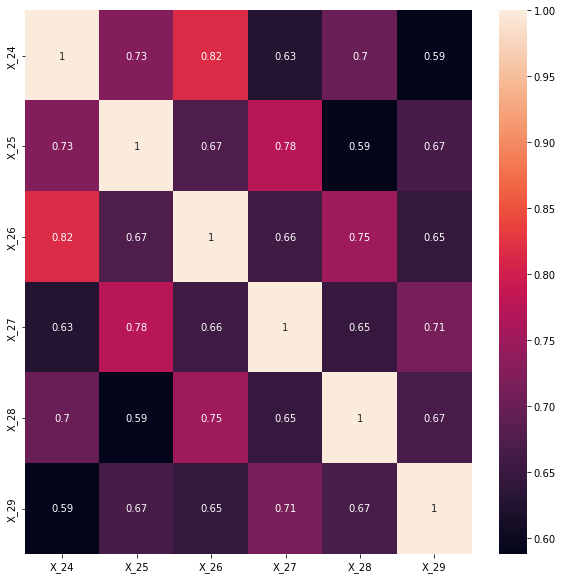

In [ ]:
plt.figure(figsize=(10,10))
cc = train[['X_24', 'X_25', 'X_26','X_27','X_28','X_29']].corr()
sns.heatmap(cc,annot=True)
plt.show()

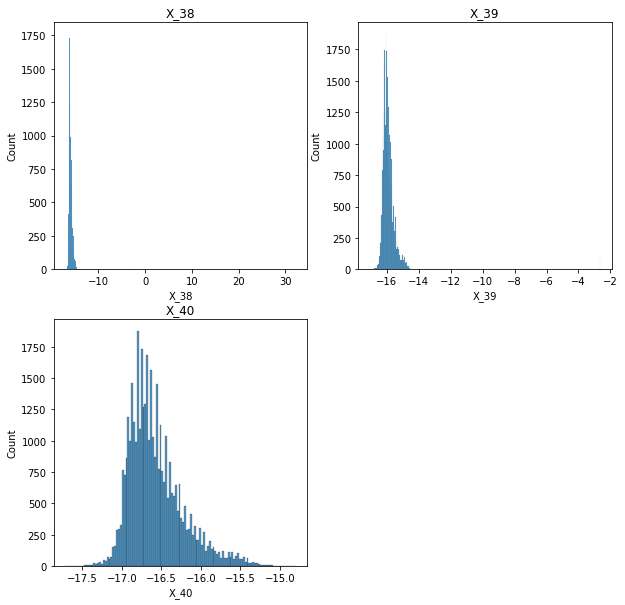

In [ ]:
wh = ['X_38', 'X_39', 'X_40']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(2,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

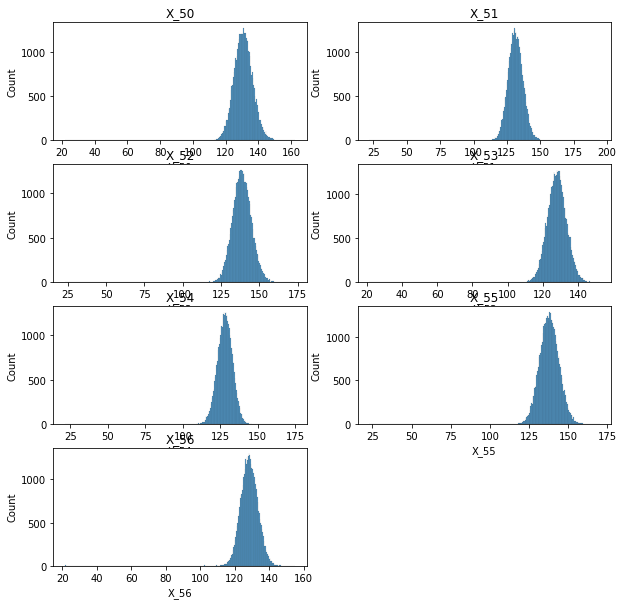

In [ ]:
wh = ['X_50', 'X_51', 'X_52','X_53','X_54','X_55','X_56']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(2,4,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

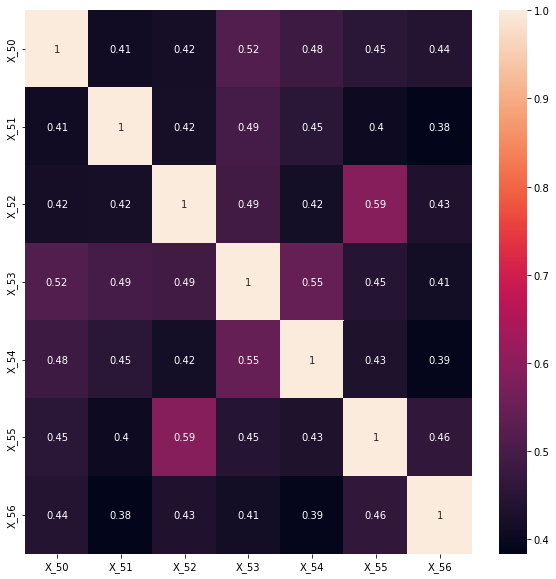

In [ ]:
plt.figure(figsize=(10,10))
cc = train[['X_50', 'X_51', 'X_52','X_53','X_54','X_55','X_56']].corr()
sns.heatmap(cc,annot=True)
plt.show()

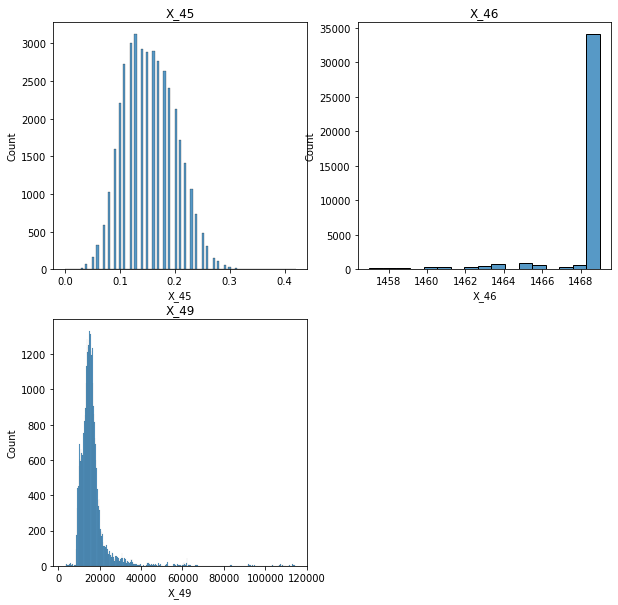

In [ ]:
wh = ['X_45', 'X_46', 'X_49']
plt.figure(figsize=(10,10))
for i in range(len(wh)):
    plt.subplot(2,2,i+1)
    plt.title(wh[i])
    sns.histplot(train[wh[i]])
plt.show()

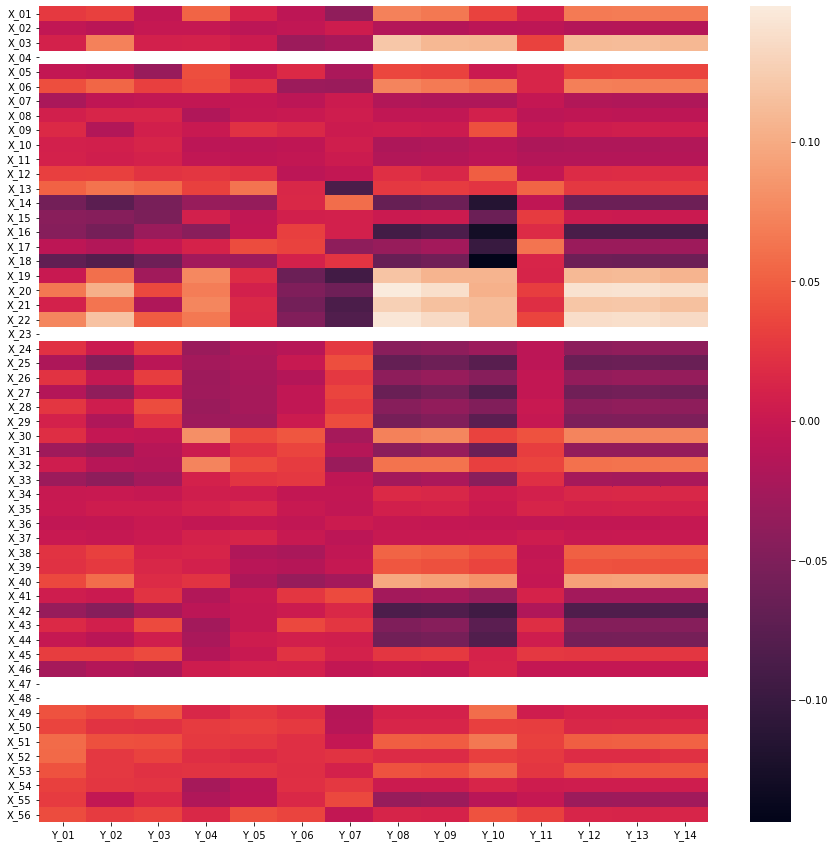

In [ ]:
plt.figure(figsize=(15,15))
cc = pd.DataFrame()
for i in range(len(y)):
    cc_0 = pd.concat([train[x],train[y[i]]], axis=1)
    ccc_0 = cc_0.corr()[y[i]][:-1]
    cc = pd.concat([cc,ccc_0],axis=1)

sns.heatmap(cc)
plt.show()

In [ ]:
x_train = train[x].drop(['X_04','X_23','X_47','X_48'], axis=1)
y_train = train[y]
x_test = test.drop(['ID','X_04','X_23','X_47','X_48'], axis=1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape

((39607, 52), (39608, 52), (39607, 14))

In [ ]:
sds, mms = StandardScaler(), MinMaxScaler()
for i in x_train.columns:
    x_train[i] = sds.fit_transform(x_train[[i]])
    x_test[i] = sds.transform(x_test[[i]])
    x_train[i] = mms.fit_transform(x_train[[i]])
    x_test[i] = mms.transform(x_test[[i]])

# feture select(train1)

In [ ]:
x, y = [],[]
for i in train.columns:
    if i[0] == 'X':
        x.append(i)
    elif i[0] == 'Y':
        y.append(i)
print(x)
print(y)

['X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56']
['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09', 'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14']


In [ ]:
x_train = train[x].drop(['X_04','X_23','X_47','X_48'], axis=1)
x_test = test.drop(['ID','X_04','X_23','X_47','X_48'], axis=1)
y_train = train[y]
x_train.head(3)

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,X_11,...,X_45,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,101.892,74.983,29.45,62.38,245.71,0.0,0.0,...,0.29,1463,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,0.0,0.0,...,0.13,1463,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,0.0,0.0,...,0.14,1468,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232


In [ ]:
x_train = train[['X_19','X_20','X_34','X_35','X_03','X_10','X_14','X_15','X_24','X_25','X_26','X_50','X_51','X_21','X_22','X_36','X_37','X_11','X_07','X_16','X_17','X_27','X_28','X_29','X_52','X_53','X_30','X_31','X_01','X_02','X_08','X_09','X_18','X_13','X_41','X_42','X_12','X_54','X_55','X_32','X_33','X_05','X_06','X_38','X_39','X_40','X_45','X_43','X_44','X_46','X_56','X_49']]
x_test = x_test[['X_19','X_20','X_34','X_35','X_03','X_10','X_14','X_15','X_24','X_25','X_26','X_50','X_51','X_21','X_22','X_36','X_37','X_11','X_07','X_16','X_17','X_27','X_28','X_29','X_52','X_53','X_30','X_31','X_01','X_02','X_08','X_09','X_18','X_13','X_41','X_42','X_12','X_54','X_55','X_32','X_33','X_05','X_06','X_38','X_39','X_40','X_45','X_43','X_44','X_46','X_56','X_49']]
x_train.head(3)

,X_19,X_20,X_34,X_35,X_03,X_10,X_14,X_15,X_24,X_25,...,X_06,X_38,X_39,X_40,X_45,X_43,X_44,X_46,X_56,X_49
0,3.11,3.17,12.99,12.88,67.47,0.0,13.34,13.37,2.05,2.07,...,74.983,-16.41,-16.36,-17.03,0.29,21.28,21.09,1463,125.028256,9706.03
1,2.97,3.11,12.92,12.87,65.17,0.0,13.33,13.33,2.10,2.10,...,72.943,-16.06,-16.11,-16.74,0.13,21.16,21.13,1463,124.877308,10423.43
2,3.04,3.04,12.97,12.87,64.07,0.0,13.36,13.36,2.07,2.06,...,72.943,-16.16,-16.17,-16.76,0.14,21.17,21.12,1468,122.238232,10948.53


In [ ]:
sds, mms = StandardScaler(), MinMaxScaler()
for i in x_train.columns:
    x_train[i] = sds.fit_transform(x_train[[i]])
    x_test[i] = sds.transform(x_test[[i]])
    x_train[i] = mms.fit_transform(x_train[[i]])
    x_test[i] = mms.transform(x_test[[i]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
x_train.head(3)

,X_19,X_20,X_34,X_35,X_03,X_10,X_14,X_15,X_24,X_25,...,X_06,X_38,X_39,X_40,X_45,X_43,X_44,X_46,X_56,X_49
0,0.280899,0.404762,0.625000,0.250000,0.336391,0.0,0.558824,0.518519,0.423077,0.282051,...,0.520025,0.013788,0.050554,0.236301,0.690476,0.786885,0.410256,0.500000,0.774036,0.057221
1,0.123596,0.333333,0.333333,0.214286,0.266055,0.0,0.529412,0.370370,0.519231,0.358974,...,0.440003,0.020884,0.067867,0.335616,0.309524,0.590164,0.512821,0.500000,0.772908,0.063671
2,0.202247,0.250000,0.541667,0.214286,0.232416,0.0,0.617647,0.481481,0.461538,0.256410,...,0.440003,0.018856,0.063712,0.328767,0.333333,0.606557,0.487179,0.916667,0.753194,0.068392


In [ ]:
x_train.shape

(39607, 52)

In [ ]:
x_train = np.array(x_train).reshape(-1,4,13,1)
x_test = np.array(x_test).reshape(-1,4,13,1)
x_train[0]

array([[[0.28089888],
        [0.4047619 ],
        [0.625     ],
        [0.25      ],
        [0.33639144],
        [0.        ],
        [0.55882353],
        [0.51851852],
        [0.42307692],
        [0.28205128],
        [0.18918919],
        [0.81837832],
        [0.65728342]],

       [[0.27058824],
        [0.29787234],
        [0.2       ],
        [0.66666667],
        [0.        ],
        [0.10225755],
        [0.4       ],
        [0.55      ],
        [0.19444444],
        [0.30952381],
        [0.97058824],
        [0.82971339],
        [0.86196506]],

       [[0.5974026 ],
        [0.16490166],
        [0.5       ],
        [0.        ],
        [0.01018314],
        [0.34693537],
        [0.58064516],
        [0.56521739],
        [0.52808989],
        [0.30769231],
        [0.31818182],
        [0.67831284],
        [0.77282601]],

       [[0.47340426],
        [0.15694444],
        [0.08513709],
        [0.5200251 ],
        [0.01378751],
        [0.05055402],
    

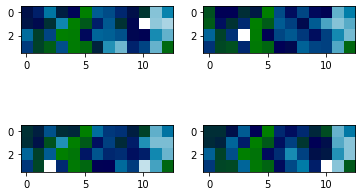

In [ ]:
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_train[i].reshape(4,13), cmap='ocean')
plt.show()

In [ ]:
x_train.shape, x_test.shape, y_train.shape

((39607, 4, 13, 1), (39608, 4, 13, 1), (39607, 14))

# feture select2(train2)

In [ ]:
x, y = [],[]
for i in train.columns:
    if i[0] == 'X':
        x.append(i)
    elif i[0] == 'Y':
        y.append(i)
print(x)
print(y)

['X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56']
['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09', 'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14']


In [ ]:
x_train = train[x].drop(['X_04','X_23','X_47','X_48'], axis=1)
x_test = test.drop(['ID','X_04','X_23','X_47','X_48'], axis=1)
y_train = train[y]
x_train.head(3)

,X_01,X_02,X_03,X_05,X_06,X_07,X_08,X_09,X_10,X_11,...,X_45,X_46,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,101.892,74.983,29.45,62.38,245.71,0.0,0.0,...,0.29,1463,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,101.944,72.943,28.73,61.23,233.61,0.0,0.0,...,0.13,1463,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,103.153,72.943,28.81,105.77,272.20,0.0,0.0,...,0.14,1468,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232


In [ ]:
x_train = train[['X_19','X_20','X_34','X_35','X_03','X_10','X_14','X_15','X_24','X_25','X_26','X_50','X_51','X_21','X_22','X_36','X_37','X_11','X_07','X_16','X_17','X_27','X_28','X_29','X_52','X_53','X_30','X_31','X_01','X_02','X_08','X_09','X_18','X_13','X_41','X_42','X_12','X_54','X_55','X_32','X_33','X_05','X_06','X_38','X_39','X_40','X_45','X_43','X_44','X_46','X_56','X_49']]
x_test = x_test[['X_19','X_20','X_34','X_35','X_03','X_10','X_14','X_15','X_24','X_25','X_26','X_50','X_51','X_21','X_22','X_36','X_37','X_11','X_07','X_16','X_17','X_27','X_28','X_29','X_52','X_53','X_30','X_31','X_01','X_02','X_08','X_09','X_18','X_13','X_41','X_42','X_12','X_54','X_55','X_32','X_33','X_05','X_06','X_38','X_39','X_40','X_45','X_43','X_44','X_46','X_56','X_49']]
x_train.head(3)

,X_19,X_20,X_34,X_35,X_03,X_10,X_14,X_15,X_24,X_25,...,X_06,X_38,X_39,X_40,X_45,X_43,X_44,X_46,X_56,X_49
0,3.11,3.17,12.99,12.88,67.47,0.0,13.34,13.37,2.05,2.07,...,74.983,-16.41,-16.36,-17.03,0.29,21.28,21.09,1463,125.028256,9706.03
1,2.97,3.11,12.92,12.87,65.17,0.0,13.33,13.33,2.10,2.10,...,72.943,-16.06,-16.11,-16.74,0.13,21.16,21.13,1463,124.877308,10423.43
2,3.04,3.04,12.97,12.87,64.07,0.0,13.36,13.36,2.07,2.06,...,72.943,-16.16,-16.17,-16.76,0.14,21.17,21.12,1468,122.238232,10948.53


In [ ]:
sds, mms = StandardScaler(), MinMaxScaler()
for i in x_train.columns:
    x_train[i] = sds.fit_transform(x_train[[i]])
    x_test[i] = sds.transform(x_test[[i]])
    x_train[i] = mms.fit_transform(x_train[[i]])
    x_test[i] = mms.transform(x_test[[i]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
x_train1 = np.array(x_train).reshape(-1,4,13,1)
x_test1 = np.array(x_test).reshape(-1,4,13,1)
x_train1[0]

array([[[0.28089888],
        [0.4047619 ],
        [0.625     ],
        [0.25      ],
        [0.33639144],
        [0.        ],
        [0.55882353],
        [0.51851852],
        [0.42307692],
        [0.28205128],
        [0.18918919],
        [0.81837832],
        [0.65728342]],

       [[0.27058824],
        [0.29787234],
        [0.2       ],
        [0.66666667],
        [0.        ],
        [0.10225755],
        [0.4       ],
        [0.55      ],
        [0.19444444],
        [0.30952381],
        [0.97058824],
        [0.82971339],
        [0.86196506]],

       [[0.5974026 ],
        [0.16490166],
        [0.5       ],
        [0.        ],
        [0.01018314],
        [0.34693537],
        [0.58064516],
        [0.56521739],
        [0.52808989],
        [0.30769231],
        [0.31818182],
        [0.67831284],
        [0.77282601]],

       [[0.47340426],
        [0.15694444],
        [0.08513709],
        [0.5200251 ],
        [0.01378751],
        [0.05055402],
    

In [ ]:
x_train2 = x_train.copy()
x_test2 = x_test.copy()

In [ ]:
x_train1.shape, x_test1.shape, x_train2.shape, x_test2.shape, y_train.shape

((39607, 4, 13, 1), (39608, 4, 13, 1), (39607, 52), (39608, 52), (39607, 14))

# modeling

In [ ]:
x_train = np.array(x_train).reshape(-1,4,13,1)
x_test = np.array(x_test).reshape(-1,4,13,1)

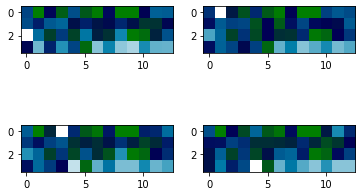

In [ ]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_train[i].reshape(4,13), cmap='ocean')
plt.show()

In [ ]:
def model_make1():
    inputs = layers.Input(shape=(4,13,1))
    x = layers.Conv2D(32,1,1,padding='same',activation='relu')(inputs)
    x = layers.Conv2D(64,1,1,padding='same',activation='relu')(x)
    x = layers.Conv2D(128,1,1,padding='same',activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64,activation='relu')(x)
    outputs = layers.Dense(14)(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [ ]:
def model_make2():
    inputs = layers.Input(shape=(4,13,1))
    x = layers.Conv2D(32,1,1,padding='same',activation='relu')(inputs)
    x = layers.Conv2D(64,1,1,padding='same',activation='relu')(x)
    x = layers.Conv2D(128,1,1,padding='same',activation='relu')(x)
    x = layers.Conv2D(256,1,1,padding='same',activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256,activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64,activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(14)(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [ ]:
model = model_make1()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 13, 1)]        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 13, 32)         64        
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 13, 64)         2112      
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 13, 128)        8320      
                                                                 
 flatten_1 (Flatten)         (None, 6656)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               852096    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0   

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
eary_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
his = model.fit(x_train, y_train, epochs=50, validation_split=0.2,callbacks=[eary_stop])

Epoch 1/50
991/991 [==============================] - 17s 17ms/step - loss: 1.5994 - val_loss: 1.2479
Epoch 2/50
991/991 [==============================] - 18s 18ms/step - loss: 1.6000 - val_loss: 1.2488
Epoch 3/50
991/991 [==============================] - 17s 17ms/step - loss: 1.5987 - val_loss: 1.2669
Epoch 4/50
991/991 [==============================] - 17s 18ms/step - loss: 1.5973 - val_loss: 1.3112


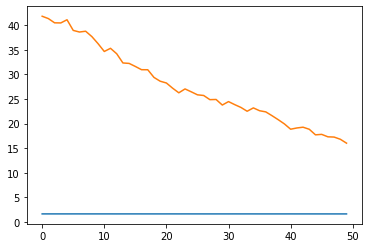

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [ ]:
pre = model.predict(x_test)

In [ ]:
pre[0:2]

array([[  1.2682319 ,   0.9979039 ,   0.94675493,  12.736328  ,
         30.191704  ,  16.167028  ,   3.2446463 , -26.379753  ,
        -26.391752  , -22.522968  ,  24.21415   , -26.315916  ,
        -26.322042  , -26.319143  ],
       [  1.2712828 ,   1.003512  ,   0.9441963 ,  12.827002  ,
         30.236897  ,  16.152056  ,   3.2329345 , -26.359728  ,
        -26.371412  , -22.49725   ,  24.233713  , -26.294304  ,
        -26.301281  , -26.293875  ]], dtype=float32)

In [ ]:
pre.shape

(39608, 14)

In [ ]:
sub = pd.read_csv('/content/sample_submission.csv')
sub.shape

(39608, 15)

In [ ]:
a = 0
for i in sub.columns[1:]:
    sub[i] = pre.T[a]
    a += 1

In [ ]:
sub.to_csv('sub.csv', index=False)

# modeling2

In [ ]:
def model_make2():
    inputs = layers.Input(shape=(52))
    x = layers.Dense(32,activation='relu')(inputs)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(64,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(256,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(512,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(1024,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(64,activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(14)(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

In [ ]:
model = model_make2()
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 52)]              0         
                                                                 
 dense_33 (Dense)            (None, 32)                1696      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 64)                2112      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 128)               8320      
                                                                 
 dropout_25 (Dropout)        (None, 128)               0   

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
his = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
991/991 [==============================] - 20s 20ms/step - loss: 5.7497 - val_loss: 1.2807
Epoch 2/50
991/991 [==============================] - 19s 19ms/step - loss: 5.3788 - val_loss: 1.2324
Epoch 3/50
991/991 [==============================] - 18s 18ms/step - loss: 5.0625 - val_loss: 1.3413
Epoch 4/50
991/991 [==============================] - 18s 18ms/step - loss: 4.7218 - val_loss: 1.3365
Epoch 5/50
991/991 [==============================] - 17s 17ms/step - loss: 4.4165 - val_loss: 1.2843
Epoch 6/50
991/991 [==============================] - 17s 17ms/step - loss: 4.1463 - val_loss: 1.4381
Epoch 7/50
991/991 [==============================] - 17s 18ms/step - loss: 3.8896 - val_loss: 1.3076
Epoch 8/50
991/991 [==============================] - 18s 18ms/step - loss: 3.6195 - val_loss: 1.3631
Epoch 9/50
991/991 [==============================] - 18s 19ms/step - loss: 3.4208 - val_loss: 1.2090
Epoch 10/50
991/991 [==============================] - 18s 18ms/step - loss: 3.200

In [ ]:
pre = model.predict(x_test)

In [ ]:
sub = pd.read_csv('/content/sample_submission.csv')
a = 0
for i in sub.columns[1:]:
    sub[i] = pre.T[a]
    a += 1
sub.to_csv('sub.csv', index=False)

# modeling3

In [174]:
def model_make3():
    inputs1 = layers.Input(shape=(4,13,1))
    inputs2 = layers.Input(shape=(52))

    x1 = layers.Conv2D(32,1,1,padding='same',activation='relu')(inputs1)
    x1 = layers.Conv2D(64,1,1,padding='same',activation='relu')(x1)
    x1 = layers.Conv2D(128,1,1,padding='same',activation='relu')(x1)
    x1 = layers.Conv2D(256,1,1,padding='same',activation='relu')(x1)
    x1 = layers.Conv2D(512,1,1,padding='same',activation='relu')(x1)
    x1 = layers.Flatten()(x1)
    x1 = layers.Dense(128,activation='relu')(x1)
    x1 = layers.Dropout(0.2)(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dense(64,activation='relu')(x1)
    x1 = layers.Dropout(0.5)(x1)

    x2 = layers.Dense(1024,activation='relu')(inputs2)
    x2 = layers.Dropout(0.1)(x2)
    x2 = layers.Dense(512,activation='relu')(x2)
    x2 = layers.Dropout(0.1)(x2)
    x2 = layers.Dense(256,activation='relu')(x2)
    x2 = layers.Dropout(0.1)(x2)
    x2 = layers.Dense(128,activation='relu')(x2)
    x2 = layers.Dropout(0.1)(x2)
    x2 = layers.Dense(64,activation='relu')(x2)
    x2 = layers.Dropout(0.5)(x2)

    xx = layers.concatenate([x1,x2])

    outputs = layers.Dense(14)(xx)

    model = tf.keras.Model((inputs1, inputs2), outputs)
    return model

In [175]:
model = model_make3()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 4, 13, 1)]   0           []                               
                                                                                                  
 conv2d_15 (Conv2D)             (None, 4, 13, 32)    64          ['input_9[0][0]']                
                                                                                                  
 input_10 (InputLayer)          [(None, 52)]         0           []                               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 4, 13, 64)    2112        ['conv2d_15[0][0]']              
                                                                                            

In [176]:
model.compile(optimizer='adam', loss='mse')

In [177]:
eary_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [178]:
his = model.fit((x_train1,x_train2), y_train, epochs=100, validation_split=0.2,callbacks=[eary_stop])

Epoch 1/100
991/991 [==============================] - 98s 98ms/step - loss: 20.2616 - val_loss: 1.2128
Epoch 2/100
991/991 [==============================] - 95s 96ms/step - loss: 7.3547 - val_loss: 1.3065
Epoch 3/100
991/991 [==============================] - 96s 97ms/step - loss: 6.5724 - val_loss: 1.4344
Epoch 4/100
991/991 [==============================] - 94s 95ms/step - loss: 6.1723 - val_loss: 1.2307


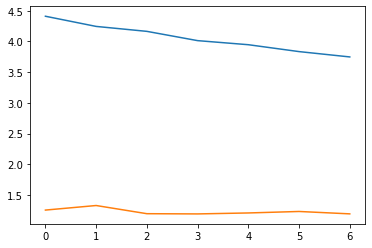

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [ ]:
pre = model.predict((x_test1, x_test2))

In [ ]:
sub = pd.read_csv('/content/sample_submission.csv')
sub.shape

(39608, 15)

In [ ]:
a = 0
for i in sub.columns[1:]:
    sub[i] = pre.T[a]
    a += 1

In [ ]:
sub.to_csv('sub.csv', index=False)